In [1]:
import tushare as ts
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_price = ts.get_hist_data('603881',start='2020-02-03',end='2020-04-01')#
change_list = df_price["p_change"].tolist()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [3]:
current_date = '2020-02-03'
volume_list = []
for i in range(59):
    df = ts.get_tick_data("603881", date=current_date, src='tt') 
    try:
        df["time"] = df["time"].map(lambda x:datetime.datetime.strptime(x, "%H:%M:%S"))
        volume_stock = df.loc[df["time"]<="1900-01-01 09:50:00"]["volume"].sum()
        volume_list.append(volume_stock)
    except:
        pass
    delta=datetime.timedelta(days=1)
    date = datetime.datetime.strptime(current_date, "%Y-%m-%d")
    n_days=date+delta
    current_date = n_days.strftime('%Y-%m-%d')
    current_date = str(current_date)

In [4]:
volume_list_today = [] #采用当日交易量和昨日交易量的方法
for i in range(43):
    if i == 0:
        new_item = 0
    else:
        new_item = (volume_list[i] - volume_list[i-1])/volume_list[i-1]
    volume_list_today.append(new_item*100)

In [5]:
volume_list_all = [] #采用当日交易量和多日交易量的平均值的方法
for i in range(43):
    if i == 0:
        new_item = 0
    else:
        av_num = 0
        for n in range(i):
            av_num+=volume_list[n]
        av_num = av_num/i
        new_item = (volume_list[i] - av_num)/av_num
    volume_list_all.append(new_item*100)

In [6]:
pccs_today = np.corrcoef(volume_list_today, change_list)#当日交易量和昨日交易量_成交量涨跌幅和价格涨跌幅相关系数
print(pccs_today)

[[ 1.         -0.35907668]
 [-0.35907668  1.        ]]


In [7]:
pccs_all = np.corrcoef(volume_list_all, change_list)#当日交易量和多日交易量的平均值_成交量涨跌幅和价格涨跌幅相关系数
print(pccs_all)

[[ 1.         -0.42613044]
 [-0.42613044  1.        ]]


<Figure size 432x288 with 0 Axes>

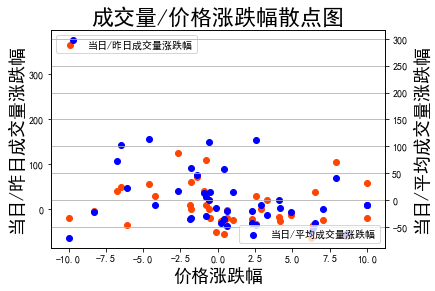

In [10]:
import matplotlib.pyplot as mp
x = change_list
y1 = volume_list_today
y2 = volume_list_all
#画布初始设定:
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] =False
mp.gcf().set_facecolor(np.ones(3) * 240/255)#设置背景色
fig, ax1 = plt.subplots() # 使用subplots()创建窗口
# 绘制折线图像1, 标签，线宽
ax1.scatter(x, y1, c='orangered', label='当日/昨日成交量涨跌幅', linewidth = 1) 
mp.legend(loc=2)
ax2 = ax1.twinx() # 创建第二个坐标轴
ax2.scatter(x, y2, c='blue', label='当日/平均成交量涨跌幅', linewidth = 1) #同上, 'o-'
mp.legend(loc=4)
plt.grid(True)  # 样式风格：网格型
ax1.set_title("成交量/价格涨跌幅散点图",size=22)  # 大标题
ax1.set_xlabel('价格涨跌幅',size=18)  
ax1.set_ylabel('当日/昨日成交量涨跌幅',size=18)
ax2.set_ylabel('当日/平均成交量涨跌幅',size=18)
# mp.gcf().autofmt_xdate() # 自动适应刻度线密度，包括x轴，y轴
plt.show()

In [13]:
import xlwings as xw
app=xw.App(visible=True,add_book=False)
wb=app.books.add()
sht=xw.sheets.active
a_1 = ["当日/昨日成交量涨跌幅"]+y1
a_2 = ["当日/平均成交量涨跌幅"]+y2
a_3 = ["价格涨跌幅"]+x
list1=[a_1,a_2,a_3]
sht.range('A1').value=list1
sht.pictures.add(fig, name='成交量/价格涨跌幅散点图', update=True)
wb.save(r'./Q1数据即可视化.xlsx')
wb.close()
app.quit()

<Picture '成交量/价格涨跌幅散点图' in <Sheet [工作簿2]Sheet1>>